In [15]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm

import torch

In [4]:
telecom_df = pd.read_csv("telecom_churn.csv")
telecom_df.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
# Check for NA's
telecom_df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [99]:
telecom_df.describe(include = "all")

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


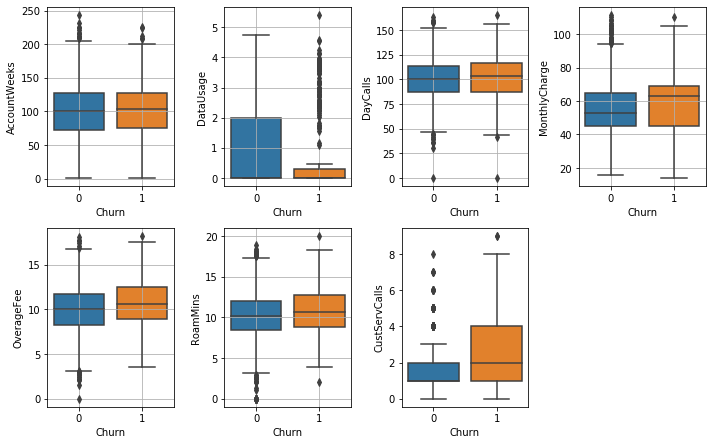

In [109]:

siz = plt.figure(figsize = (10,12))
plt.subplot(4,4,1)
sns.boxplot(data = telecom_df, x = "Churn", y = "AccountWeeks")
plt.grid(True)
plt.subplot(4,4,2)
sns.boxplot(data = telecom_df, x = "Churn", y = "DataUsage")
plt.grid(True)
plt.subplot(4,4,3)
sns.boxplot(data = telecom_df, x = "Churn", y = "DayCalls")
plt.grid(True)
plt.subplot(4,4,4)
sns.boxplot(data = telecom_df, x = "Churn", y = "MonthlyCharge")
plt.grid(True)
plt.subplot(4,4,5)
sns.boxplot(data = telecom_df, x = "Churn", y = "OverageFee")
plt.grid(True)
plt.subplot(4,4,6)
sns.boxplot(data = telecom_df, x = "Churn", y = "RoamMins")
plt.grid(True)
plt.subplot(4,4,7)
sns.boxplot(data = telecom_df, x = "Churn", y = "CustServCalls")
plt.tight_layout()
plt.show()

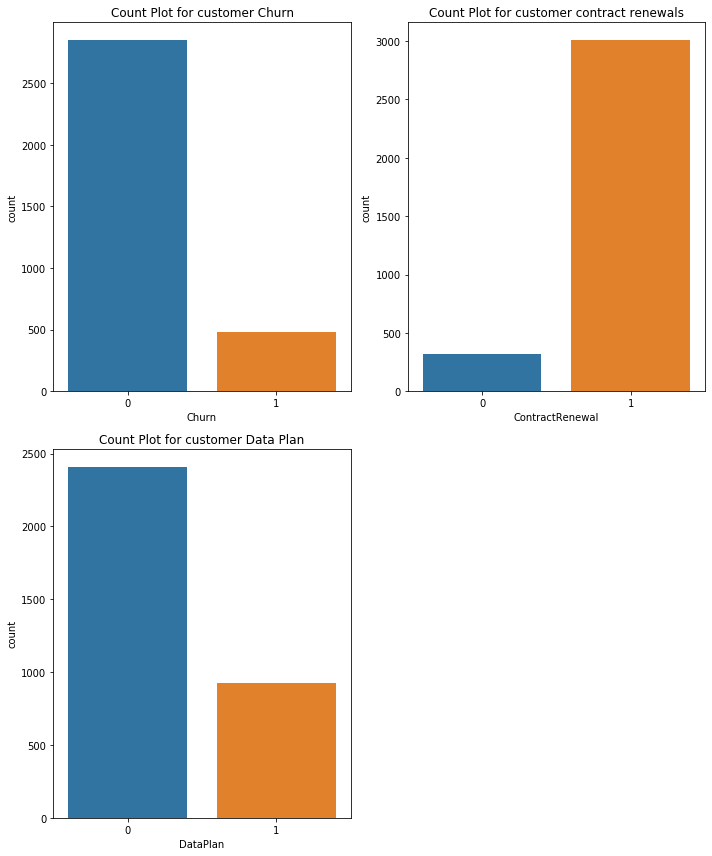

In [114]:
siz = plt.figure(figsize = (10,12))
plt.subplot(2,2,1)
sns.countplot(data = telecom_df, x = "Churn")
plt.title("Count Plot for customer Churn")
plt.subplot(2,2,2)
sns.countplot(data = telecom_df, x= "ContractRenewal")
plt.title("Count Plot for customer contract renewals")
plt.subplot(2,2,3)
sns.countplot(data = telecom_df, x= "DataPlan")
plt.title("Count Plot for customer Data Plan")


plt.tight_layout()
plt.show()


In [126]:
#Correlation
print(corr['Churn'].sort_values(ascending=False))

Churn              1.000000
CustServCalls      0.208750
DayMins            0.205151
OverageFee         0.092812
MonthlyCharge      0.072313
RoamMins           0.068239
DayCalls           0.018459
AccountWeeks       0.016541
DataUsage         -0.087195
DataPlan          -0.102148
ContractRenewal   -0.259852
Name: Churn, dtype: float64


In [117]:
# Features
X = telecom_df.iloc[:, 1:]

# Target
y = telecom_df.Churn

In [118]:
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [119]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [120]:
#LOGISTIC REGRESSION

Log_Regr = LogisticRegression()
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Log_Regr.fit(X_train,y_train)

# Predict with x test
y_pred=Log_Regr.predict(X_test)

/Users/shimaabdulla/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [121]:
print('Classes', Log_Regr.classes_)
print('Intercept',Log_Regr.intercept_)
print("Coefficients", Log_Regr.coef_ )
print("Accuracy", Log_Regr.score(X_test, y_test))
print(classification_report(y_test, Log_Regr.predict(X_test)))

Classes [0 1]
Intercept [-2.23184549]
Coefficients [[ 0.04135697 -0.55731874 -0.59798174  0.01444457  0.6867267   0.55901249
   0.02506321  0.28159861  0.23253126  0.1519085 ]]
Accuracy 0.8705035971223022
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       719
           1       0.59      0.20      0.30       115

    accuracy                           0.87       834
   macro avg       0.74      0.59      0.61       834
weighted avg       0.84      0.87      0.84       834



In [122]:
#DECISION TREE CLASSIFICATION

clf = DecisionTreeClassifier(criterion='entropy', random_state=99)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

print(classification_report(y_test, clf.predict(X_test)))

accuracy: 0.8896882494004796
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       719
           1       0.59      0.67      0.63       115

    accuracy                           0.89       834
   macro avg       0.77      0.80      0.78       834
weighted avg       0.90      0.89      0.89       834



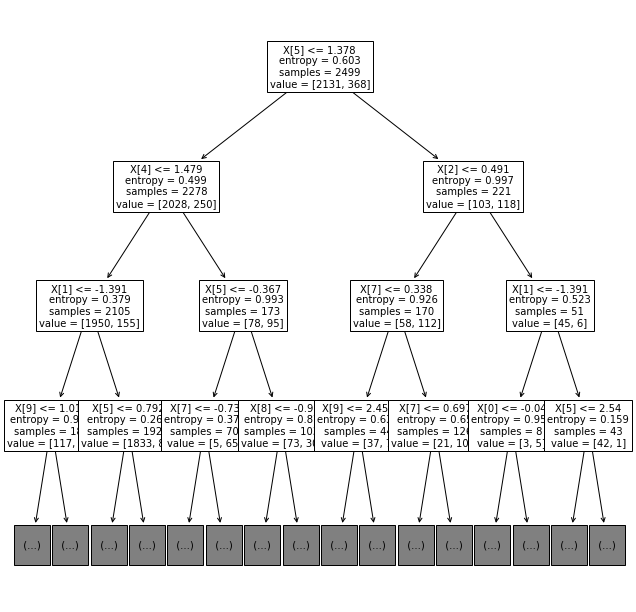

In [13]:
# Decision Tree
fig, ax = plt.subplots(figsize=(11, 11))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=10);

In [123]:
# XGBOOST
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
xg_cl.fit(X_train,y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
print(classification_report(y_test, xg_cl.predict(X_test)))

accuracy: 0.912470
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       719
           1       0.76      0.53      0.63       115

    accuracy                           0.91       834
   macro avg       0.85      0.75      0.79       834
weighted avg       0.91      0.91      0.91       834



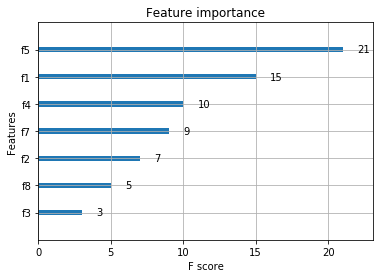

In [16]:
# Feature importance in XGBoost
xgb.plot_importance(xg_cl)
plt.show()

In [66]:
# KERAS
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(rate = 0.2))
model.add(Dense(8,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(rate = 0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

fitting = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 10, batch_size =20)

Train on 2499 samples, validate on 834 samples
Epoch 1/10
2499/2499 [==============================] - 3s 1ms/step - loss: 13.2677 - accuracy: 0.4686 - val_loss: 0.9396 - val_accuracy: 0.8129
Epoch 2/10
2499/2499 [==============================] - 1s 253us/step - loss: 1.4094 - accuracy: 0.7903 - val_loss: 0.5021 - val_accuracy: 0.8573
Epoch 3/10
2499/2499 [==============================] - 1s 251us/step - loss: 1.0292 - accuracy: 0.8251 - val_loss: 0.4435 - val_accuracy: 0.8633
Epoch 4/10
2499/2499 [==============================] - 1s 256us/step - loss: 0.9396 - accuracy: 0.8239 - val_loss: 0.4620 - val_accuracy: 0.8609
Epoch 5/10
2499/2499 [==============================] - 1s 283us/step - loss: 0.8118 - accuracy: 0.8311 - val_loss: 0.4331 - val_accuracy: 0.8609
Epoch 6/10
2499/2499 [==============================] - 1s 348us/step - loss: 0.7145 - accuracy: 0.8347 - val_loss: 0.4319 - val_accuracy: 0.8609
Epoch 7/10
2499/2499 [==============================] - 1s 351us/step - loss: 

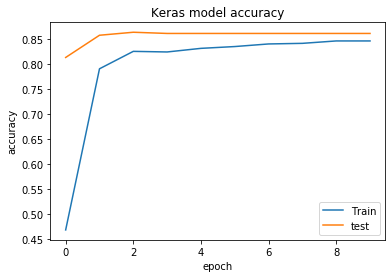

In [79]:
#accuracy = 0.8459 visualized below
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history["val_accuracy"])
plt.title("Keras model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["Train","test"])
plt.show()


In [16]:
#NEURAL NETWORK
# Training the pytorch model
torch_optimizer = torch.optim.SGD(torch_model.parameters(), lr=0.012, momentum=0.82)
torch_cost = torch.nn.MSELoss()
torch_inputs = Variable(torch.from_numpy(X.astype('float32')))
torch_outputs = Variable(torch.from_numpy(y.astype('float32')))
for epocher in range(120):
    y_pred = torch_model(torch_inputs)
    loss = torch_cost(y_pred, torch_outputs)
    loss.backward()
    torch_optimizer.zero_grad();
    torch_optimizer.step()
    if ((epocher) % 12 == 0 ):
        print('epoch {}, loss {}'.format(epocher, loss.data))




NameError: name 'torch_model' is not defined